In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Unemployment in India.csv')
df.head(769)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [22]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [23]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [24]:
df.columns = df.columns.str.strip()

In [25]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipython-input-2394721818.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [28]:
df = df.dropna()

In [29]:
df['Estimated Unemployment Rate (%)'].mean()

np.float64(11.787945945945946)

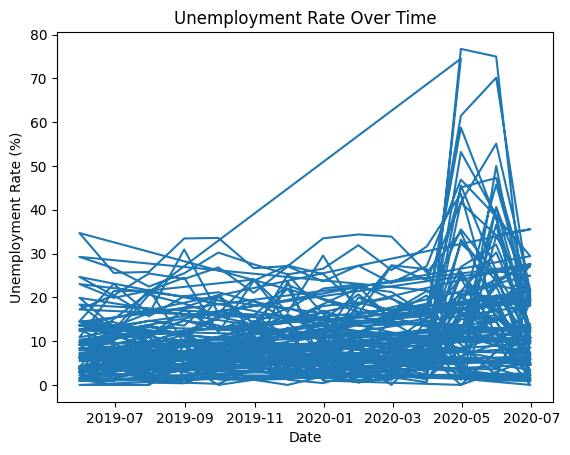

In [30]:
plt.figure()
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Over Time")
plt.show()

In [31]:
covid_df = df[
    (df['Date'] >= '2020-03-01') &
    (df['Date'] <= '2021-12-31')
]

In [32]:
region_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
region_avg.sort_values(ascending=False)

,Estimated Unemployment Rate (%)
Region,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


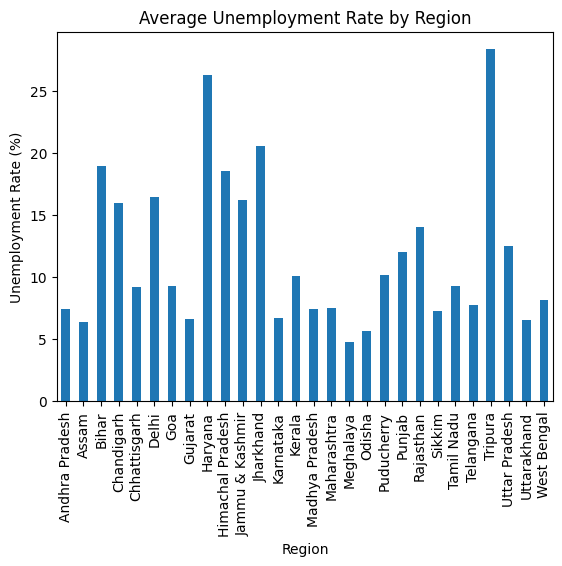

In [33]:
region_avg.plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.title("Average Unemployment Rate by Region")
plt.show()

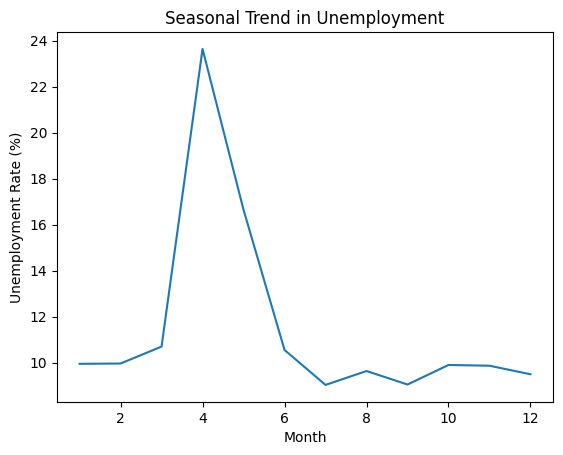

In [34]:
df['Month'] = df['Date'].dt.month

monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure()
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.title("Seasonal Trend in Unemployment")
plt.show()

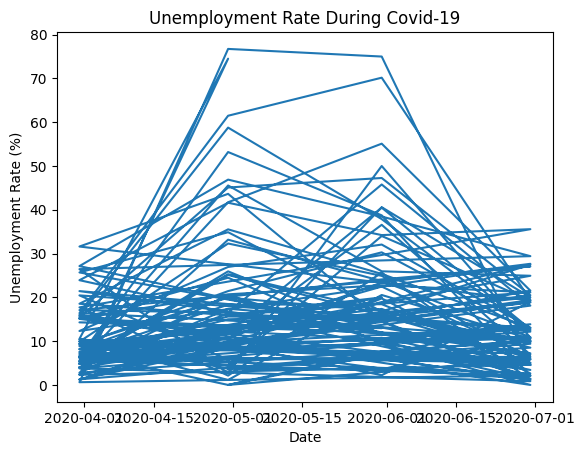

In [35]:
plt.figure()
plt.plot(covid_df['Date'], covid_df['Estimated Unemployment Rate (%)'])
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate During Covid-19")
plt.show()